<a href="https://colab.research.google.com/github/choeuneheol/study/blob/main/FIFA_%EC%84%A0%EC%88%98_%EC%9D%B4%EC%A0%81%EB%A3%8C_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C0706.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 둘러보기(구조 탐색)

### 파일별 용도 파악

In [8]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib.inline
import os

UsageError: Line magic function `%matplotlib.inline` not found.


In [ ]:
os.getcwd()

In [10]:
fifa_test = pd.read_csv('./FIFA_test.csv')
fifa_train = pd.read_csv('./FIFA_train.csv')
fifa_submission = pd.read_csv('./submission.csv')

### 데이터 양(레코드 수, 피처 수, 전체 용량 등)

In [ ]:
#테스트데이터 용량 - 329.1kb 
#테스트데이터 피처수 11
#테스트데이터 레코드수 3827
#  컬렴명해석
#  id : 선수 고유의 아이디
#  name : 이름
#  age : 나이
#  continent : 선수들의 국적이 포함되어 있는 대륙입니다
#  contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
#  position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
#  prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
#  reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
#  stat_overall : 선수의 현재 능력치 입니다.!!!!
#  stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.!!!!
#  stat_skill_moves : 선수의 개인기 능력치 입니다.
#  idid : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다

In [11]:
fifa_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


In [12]:
fifa_test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


### 피처 이해(이름, 의미, 데이터 타입, 결측값 개수, 고윳값개수, 실제값, 데이터 종류 등)

In [13]:
#데이터 타입
type(fifa_test)

pandas.core.frame.DataFrame

In [14]:
#결측값 개수
pd.isnull(fifa_test)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3823,False,False,False,False,False,False,False,False,False,False,False
3824,False,False,False,False,False,False,False,False,False,False,False
3825,False,False,False,False,False,False,False,False,False,False,False
3826,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 고윳값 개수

In [ ]:
# 실제값

In [15]:
# 데이터 종류
fifa_test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


### 훈련 데이터와 테스트 데이터 차이

In [ ]:
#테스터

In [16]:
fifa_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


In [17]:
fifa_test.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000
mean,7846.258098,25.297806,1.143939,67.336991,72.107628,2.414838
std,4870.339361,4.628236,0.448465,6.908814,6.133428,0.781153
min,1.000000,16.000000,1.000000,47.000000,52.000000,1.000000
25%,3466.250000,22.000000,1.000000,63.000000,68.000000,2.000000
50%,7643.500000,25.000000,1.000000,67.000000,72.000000,2.000000
75%,11967.000000,29.000000,1.000000,72.000000,76.000000,3.000000
max,16943.000000,42.000000,5.000000,94.000000,95.000000,5.000000


In [18]:
fifa_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [19]:
fifa_train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [20]:
fifa_test.describe(include = 'all')

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
count,3828.000000,3828,3828.000000,3828,3828,3828,3828,3828.000000,3828.000000,3828.000000,3828.000000
unique,NaN,3828,NaN,5,18,4,2,NaN,NaN,NaN,NaN
top,NaN,Cristiano Ronaldo,NaN,europe,2021,MF,right,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,2269,985,1431,2915,NaN,NaN,NaN,NaN
mean,7846.258098,NaN,25.297806,NaN,NaN,NaN,NaN,1.143939,67.336991,72.107628,2.414838
std,4870.339361,NaN,4.628236,NaN,NaN,NaN,NaN,0.448465,6.908814,6.133428,0.781153
min,1.000000,NaN,16.000000,NaN,NaN,NaN,NaN,1.000000,47.000000,52.000000,1.000000
25%,3466.250000,NaN,22.000000,NaN,NaN,NaN,NaN,1.000000,63.000000,68.000000,2.000000
50%,7643.500000,NaN,25.000000,NaN,NaN,NaN,NaN,1.000000,67.000000,72.000000,2.000000
75%,11967.000000,NaN,29.000000,NaN,NaN,NaN,NaN,1.000000,72.000000,76.000000,3.000000


### 타깃값 : 제출(예측)해야 하는 값

In [21]:
#주어진 데이터를 바탕으로 선수 이적료를 예측해보세여

# 데이터 시각화

### (필요시) 효과적인 시각화를 위한 피처 엔지니어링

### 각종 시각화

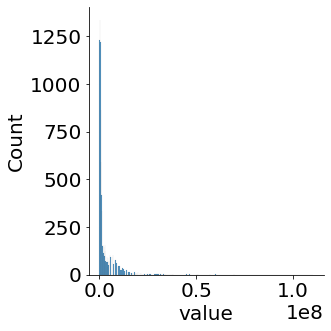

In [22]:
mpl.rc('font',size=20)
sns.displot(fifa_train['value']);
#value가 몇개가 있는가?
#왼쪽으로 편향되어있기 때문에 회귀모델을 쓸시 성능이 좋지 않다
#평향되어 있을때는 로그변환을 해주면된다.

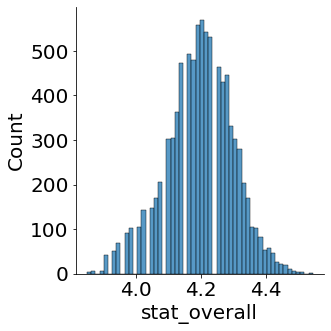

In [23]:
sns.displot(np.log(fifa_train['stat_overall']));

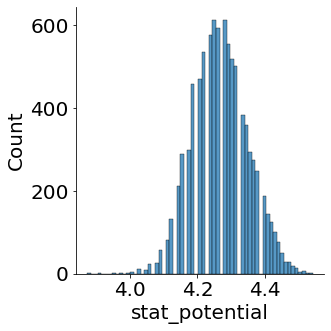

In [24]:
sns.displot(np.log(fifa_train['stat_potential']));

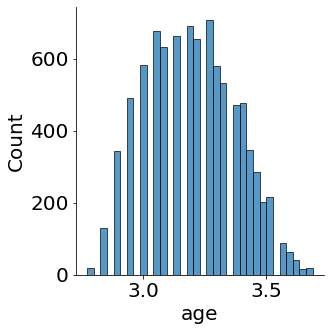

In [25]:
sns.displot(np.log(fifa_train['age']));

##### 수치형 데이터 시각화

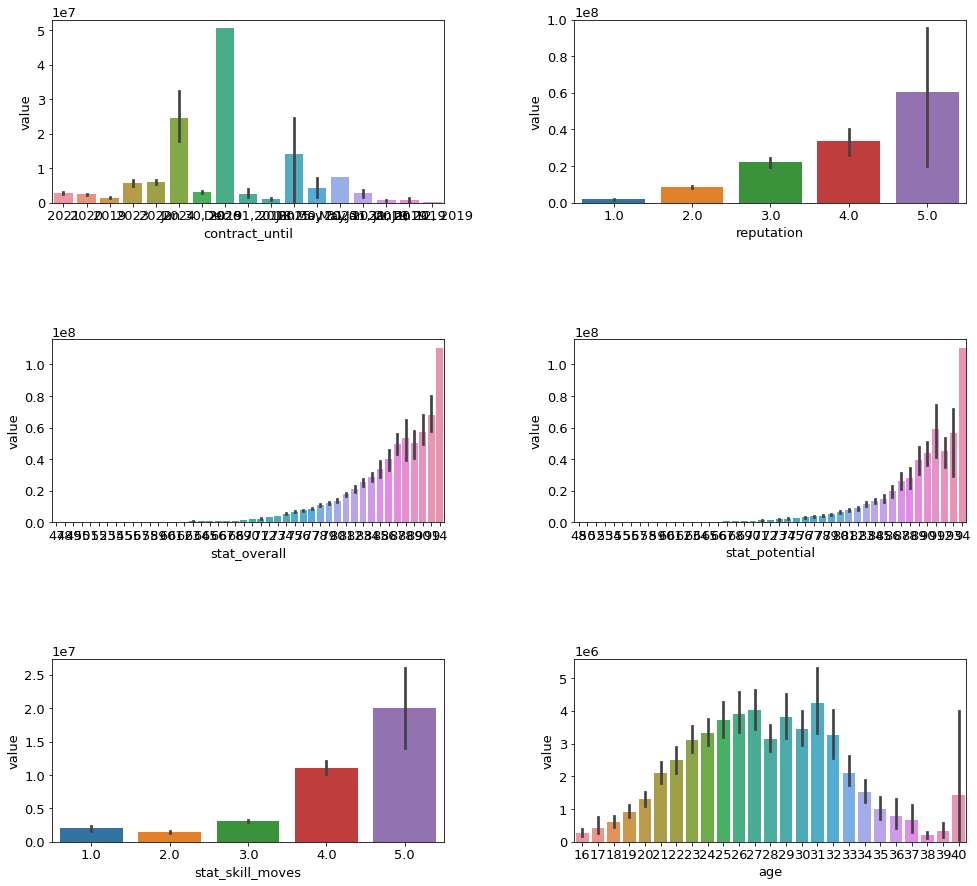

In [26]:
mpl.rc('font', size=13)
mpl.rc('axes', titlesize=16)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(15, 14)

sns.barplot(x='contract_until', y='value', data=fifa_train, ax=axes[0,0])
sns.barplot(x='reputation', y='value', data=fifa_train, ax=axes[0,1])
sns.barplot(x='stat_overall', y='value', data=fifa_train, ax=axes[1,0])
sns.barplot(x='stat_potential', y='value', data=fifa_train, ax=axes[1,1])
sns.barplot(x='stat_skill_moves', y='value', data=fifa_train, ax=axes[2,0])
sns.barplot(x='age', y='value', data=fifa_train, ax=axes[2,1])


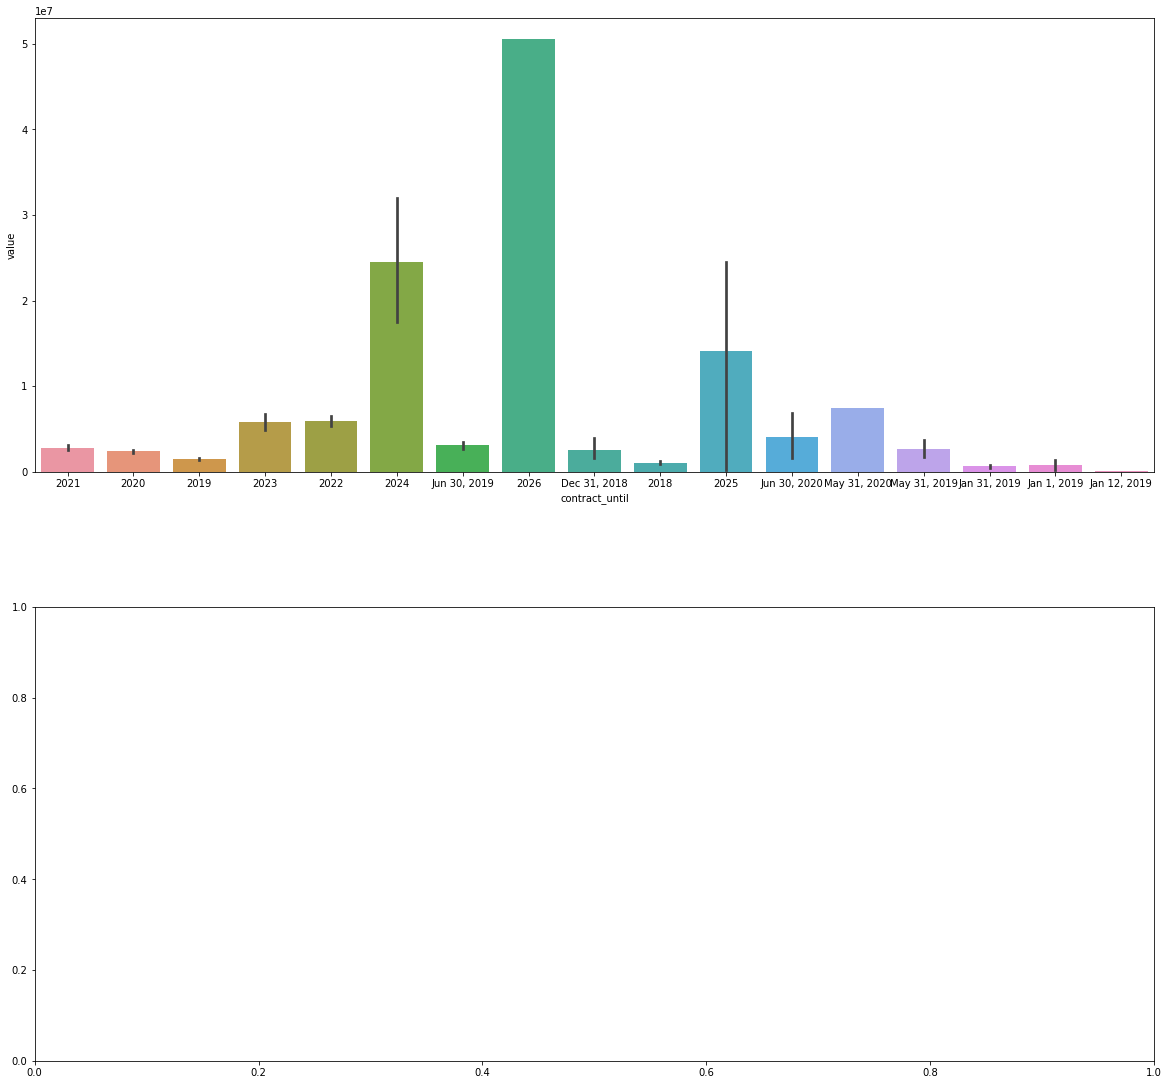

In [27]:
mpl.rc('font', size=10)
mpl.rc('axes', titlesize=3)
figure, axes = plt.subplots(nrows=2, ncols=1)
plt.tight_layout()
figure.set_size_inches(18, 17)

sns.barplot(x='contract_until', y='value', data=fifa_train, ax=axes[0])


##### 수치형 데이터 시각화

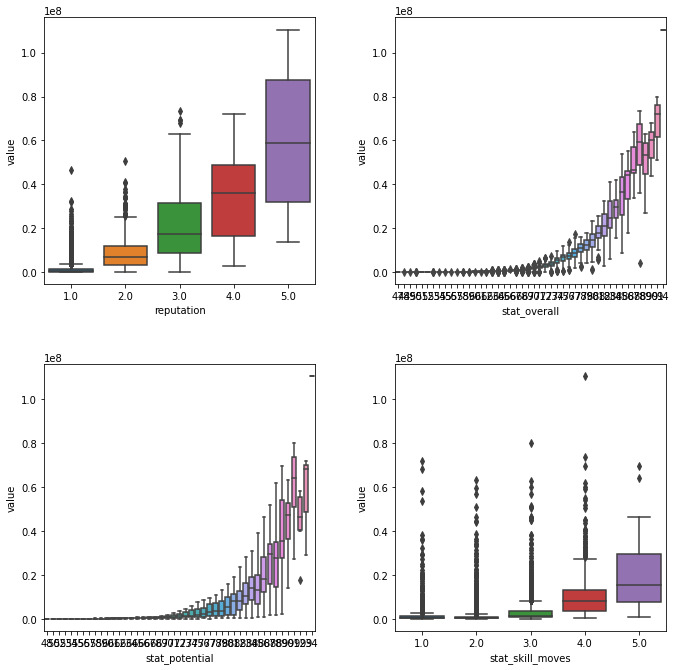

In [28]:
#박스플롯
#스텝 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 10)

#스텝 2 : 서브플롯 할당
#유명도, 선수의현재능력치, 선수의 노력과 발전정도, 선수의개인능력치 수량 박스플롯
sns.boxplot(x='reputation', y='value', data=fifa_train, ax=axes[0,0])
sns.boxplot(x='stat_overall', y='value', data=fifa_train, ax=axes[0,1])
sns.boxplot(x='stat_potential', y='value', data=fifa_train, ax=axes[1,0])
sns.boxplot(x='stat_skill_moves', y='value', data=fifa_train, ax=axes[1,1])



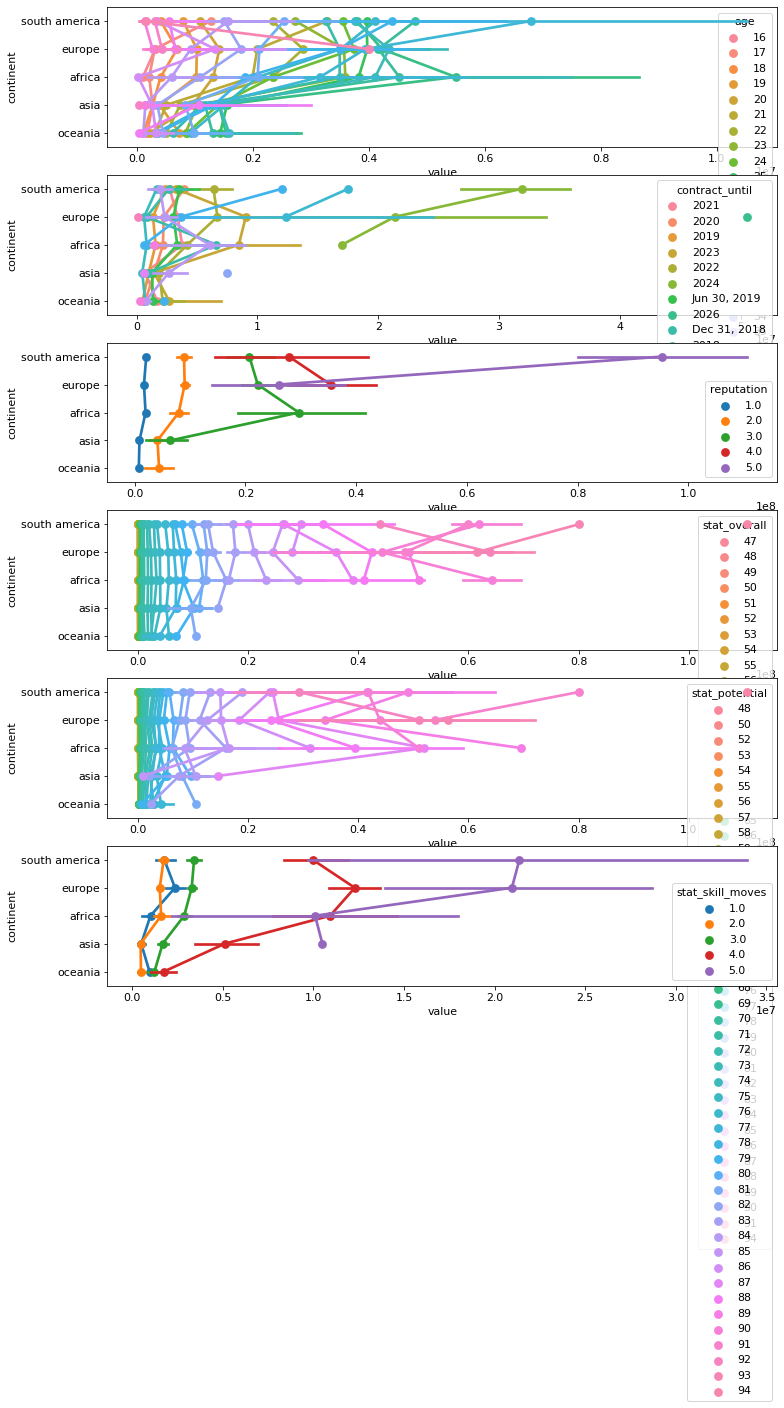

In [29]:
#포인트플롯
#스텝 1 : m행 n열 Figure 선택
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=6) # 5행 1열
figure.set_size_inches(12, 18)

#스텝 2 : 서브플롯 할당
#나이, 계약기간, 유명도, 현재능력치, 발전도, 개인기능력치 포인트플롯
sns.pointplot(x='value', y='continent', data=fifa_train, hue='age', ax=axes[0])
sns.pointplot(x='value', y='continent', data=fifa_train, hue='contract_until', ax=axes[1])
sns.pointplot(x='value', y='continent', data=fifa_train, hue='reputation', ax=axes[2])
sns.pointplot(x='value', y='continent', data=fifa_train, hue='stat_overall', ax=axes[3])
sns.pointplot(x='value', y='continent', data=fifa_train, hue='stat_potential', ax=axes[4])
sns.pointplot(x='value', y='continent', data=fifa_train, hue='stat_skill_moves', ax=axes[5])

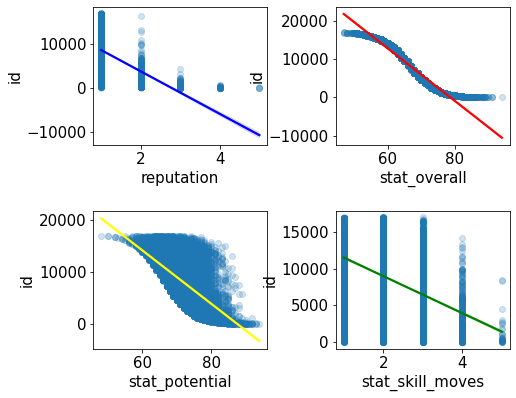

In [30]:
#스텝 1 : m행과 n열 Fifure 준비
mpl.rc('font', size= 15)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7, 6)

#스텝 2 : 서브플롯 할당
sns.regplot(x='reputation', y='id', data=fifa_train, ax=axes[0,0],
           scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x='stat_overall', y='id', data=fifa_train, ax=axes[0,1],
           scatter_kws={'alpha': 0.2}, line_kws={'color':'red'})
sns.regplot(x='stat_potential', y='id', data=fifa_train, ax=axes[1,0],
           scatter_kws={'alpha': 0.2}, line_kws={'color':'yellow'})
sns.regplot(x='stat_skill_moves', y='id', data=fifa_train, ax=axes[1,1],
           scatter_kws={'alpha': 0.2}, line_kws={'color':'green'})

##### 범주형 데이터 시각화

##### 데이터 관계 시각화

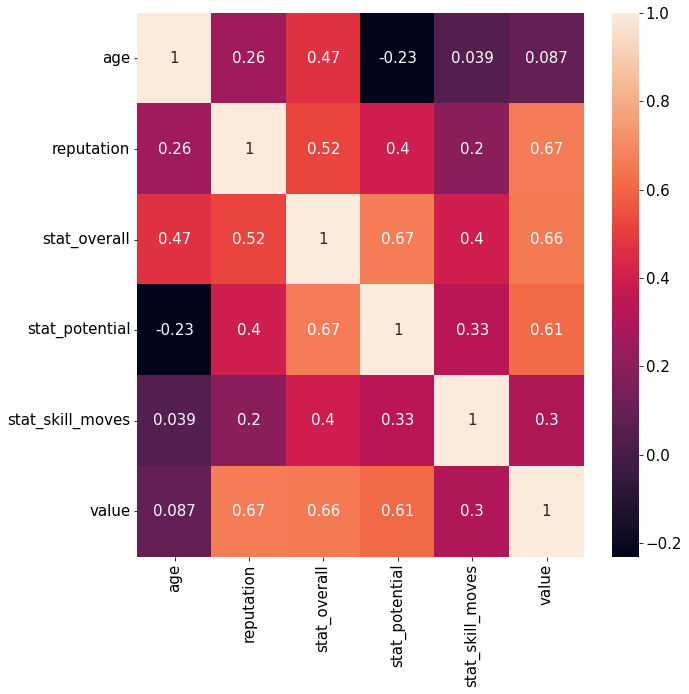

In [31]:
corrMat = fifa_train[['age','contract_until','reputation','stat_overall','stat_potential','stat_skill_moves','value']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, annot=True)

### 피처 파악

##### 추가할 피처 :

In [32]:
# 따로 추가할 피처가 없어보인다

##### 제거할 피처 :

In [33]:
#name 가 필요없을것 같다

##### 피처별 인코딩 전략 :

### 이상치 파악

##### 해당 피처별 처리 방법

### 이상치 제거

In [34]:
a_test = pd.read_csv('./FIFA_test.csv')
a_train = pd.read_csv('./FIFA_train.csv')
a_submission = pd.read_csv('./submission.csv')

In [35]:
all_data_temp = pd.concat([a_train, a_test])
all_data_temp

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0,NaN
3824,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0,NaN
3825,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0,NaN
3826,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0,NaN


In [36]:
all_data1 = pd.concat([a_train, a_test], ignore_index=True)
all_data1

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12755,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0,NaN
12756,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0,NaN
12757,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0,NaN
12758,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0,NaN


In [37]:
drop_features = ['name','contract_until']
all_data3=all_data1.drop(drop_features, axis=1)

In [38]:
# all_data3['continent'] = all_data3['continent'].map({'south america':1,
#                                                     'europe':2,
#                                                     'africa':3,
#                                                     'asia':4,
#                                                     'oceania':5})
# all_data3['position'] = all_data3['position'].map({'ST':1,
#                                                   'GK':2,
#                                                   'DF':3,
#                                                   'MF':4})
# all_data3['prefer_foot'] = all_data3['prefer_foot'].map({'right':1,
#                                                         'left':2})
# all_data3['contract_until'] = all_data3['contract_until'].map({'2021':2021,
#                                                               '2020':2020,
#                                                               '2019':2019,
#                                                               '2023':2023,
#                                                               '2022':2022,
#                                                               '2024':2024,
#                                                               '2025':2025,
#                                                               '2026':2026,
#                                                               '2018':2018,
#                                                               'Dec 31, 2018 contract_until':2018,
#                                                               'Jun 30, 2019':2019,
#                                                               'Jun 30, 2020':2020,
#                                                               'May 31, 2020':2020,
#                                                               'May 31, 2019':2019,
#                                                               'Jan 31, 2019':2018,
#                                                               'Jan 1, 2019':2018,
#                                                               'Jan 12, 2019':2018})

In [39]:
all_data3['continent'] = all_data3['continent'].map({'south america':1,
                                                    'europe':2,
                                                    'africa':3,
                                                    'asia':4,
                                                    'oceania':5})
all_data3['position'] = all_data3['position'].map({'ST':1,
                                                  'GK':2,
                                                  'DF':3,
                                                  'MF':4})
all_data3['prefer_foot'] = all_data3['prefer_foot'].map({'right':1,
                                                        'left':2})

In [40]:
all_data3.head()

,id,age,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,31,1,1,2,5.0,94,94,4.0,110500000.0
1,3,27,2,2,1,4.0,91,93,1.0,72000000.0
2,7,31,1,1,1,5.0,91,91,3.0,80000000.0
3,8,32,2,3,1,4.0,91,91,3.0,51000000.0
4,9,25,2,2,1,3.0,90,93,1.0,68000000.0


In [41]:
#훈련데이터와 테스트 데이터 나누기
x_train = all_data3[~pd.isnull(all_data3['value'])]
x_test = all_data3[pd.isnull(all_data3['value'])]

In [42]:
x_train.head()

,id,age,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,31,1,1,2,5.0,94,94,4.0,110500000.0
1,3,27,2,2,1,4.0,91,93,1.0,72000000.0
2,7,31,1,1,1,5.0,91,91,3.0,80000000.0
3,8,32,2,3,1,4.0,91,91,3.0,51000000.0
4,9,25,2,2,1,3.0,90,93,1.0,68000000.0


In [43]:
x_test.head()

,id,age,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
8932,1,33,2,1,1,5.0,94,94,5.0,NaN
8933,2,26,1,1,1,5.0,92,93,5.0,NaN
8934,4,27,2,4,1,4.0,91,92,4.0,NaN
8935,5,27,2,1,1,4.0,91,91,4.0,NaN
8936,6,32,2,4,1,4.0,91,91,4.0,NaN


In [44]:
#타깃값 count 제거
x_train = x_train.drop(['value'], axis=1)
x_test = x_test.drop(['value'], axis=1)

y = a_train['value']

In [45]:
import numpy as np

def rmse(y_true, y_pred, convertExp=True):
    #지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
    
    #로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    #RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

In [46]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [47]:
log_y = np.log(y)
linear_reg_model.fit(x_train, log_y)

LinearRegression()

In [48]:
preds = linear_reg_model.predict(x_train)

In [49]:
print(f'선형 회귀의 RMSLE 값 : {rmse(log_y, preds, True):.4f}')

선형 회귀의 RMSLE 값 : 0.2468


#데이터를 돌려본결과 네임은 빼는것이 맞다고 생각되어 빼버렸고
#계약기간에서 일반적으로는 년단위로 표시가 되어있었지만 중간중간에
#그렇지 않은 데이터들이 있어 바꾸어주다가 잘되지 않았다...
#네임피처는 버리는것이 맞는거 같지만 계약기간은 아직 잘만하면 바꿀수 있을것같다.